In [2]:
# PART I: Newtork Basics - Adapted from https://assemblingnetwork.wordpress.com/tutorials/network-basics/
# the igraph library is good for network based analyses
# Note: NetworkX is a python library for working with networks
library(igraph)
library(NetIndices)

Loading required package: MASS


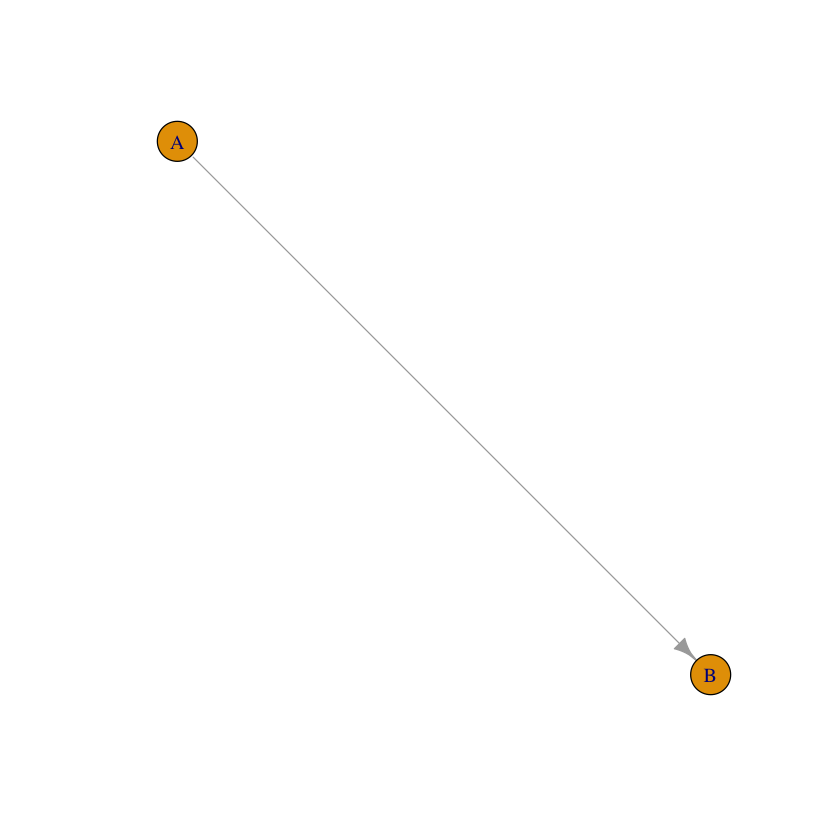

In [3]:
# Build a network using basic formulas:
graph.onelink <- graph.formula(A-+B)
 
# This gives us a two species network (A and B) with one link (represented by A-+B). 
# With this function the (+) sign signifies the "arrowhead".
plot.igraph(graph.onelink)

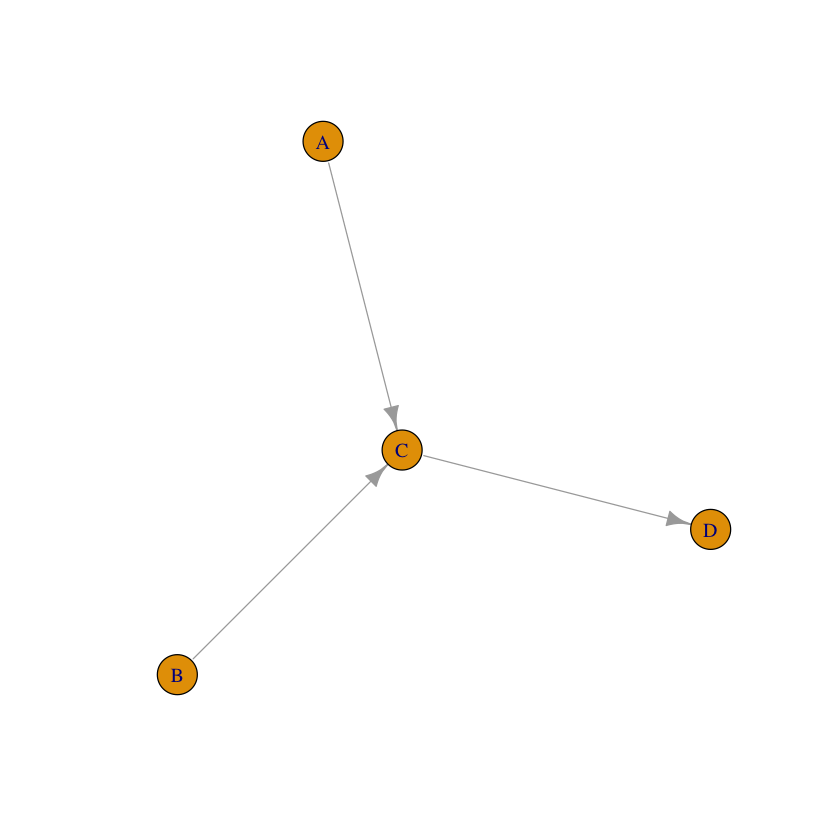

In [4]:
# Using graph.formula() you have to write out all edges explicitly
graph.fournode<-graph.formula(A-+C,B-+C,C-+D)
plot.igraph(graph.fournode)

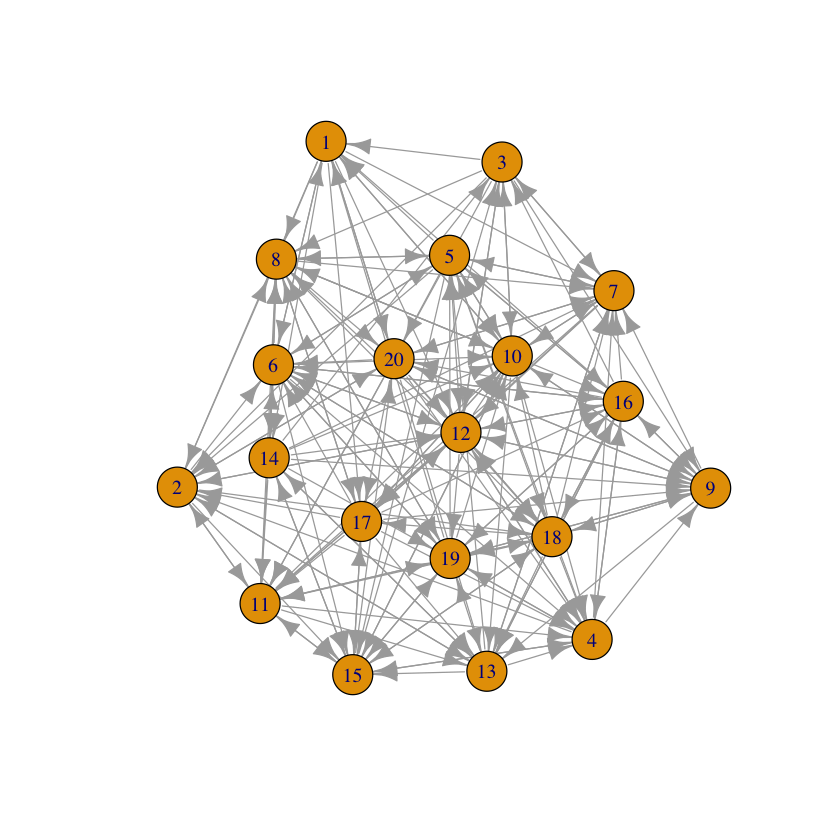

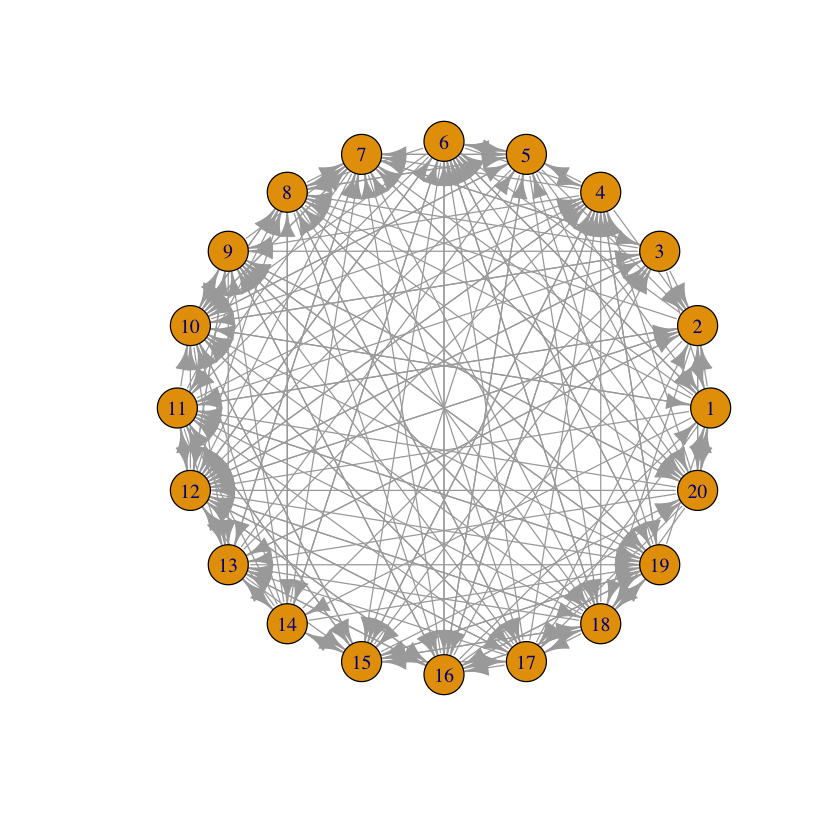

In [5]:
#igraph has a function for generating random networks of varying size and connectance. 
graph.random.gnp<-erdos.renyi.game(n=20,p.or.m=.5,type="gnp",directed=T)
plot.igraph(graph.random.gnp)
 
# We can also change the layout of the graph, here we will plot the nodes in a circle
plot.igraph(graph.random.gnp,layout=layout.circle)

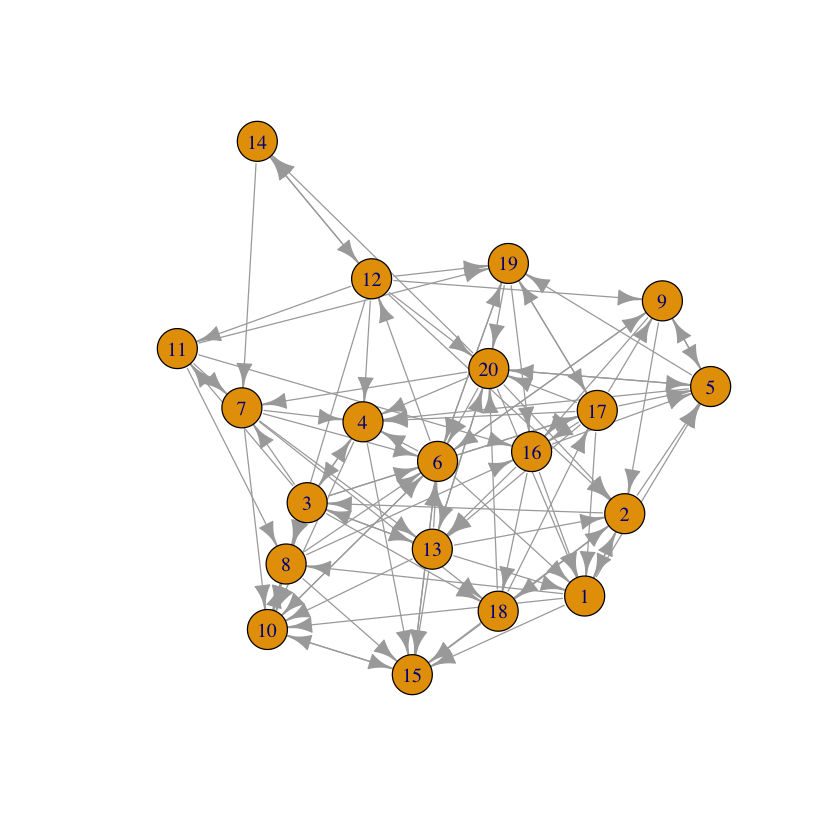

In [6]:
# The above random directed graph has 20 species ("n")
# type='gnp' tells the function to assign links with the probability "p" that we sepecifiy 
# In this case, any two nodes have a 50% probability of being connected.

# Can also set the number of links in the system to a value "m"
graph.random.gnm<-erdos.renyi.game(n=20,p.or.m=100,type="gnm",directed=T)
plot.igraph(graph.random.gnm)

[1] 4e-04

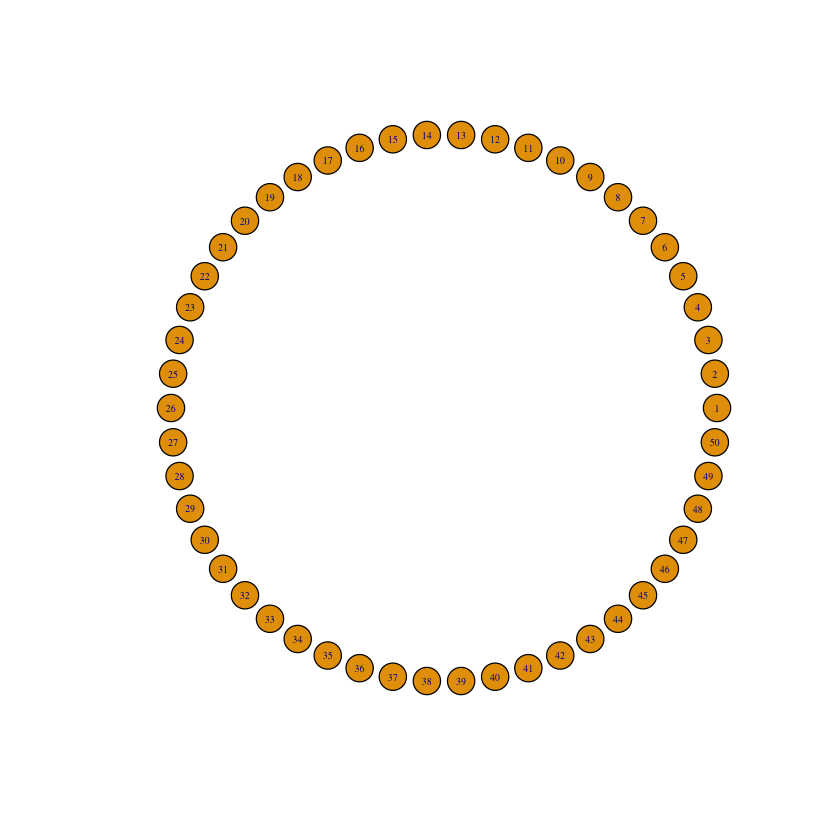

In [7]:
# Phase transitions in random graphs
# if p << 1/n^2 - expect 0 edges
n=50
1/n^2
graph.random.gnp<-erdos.renyi.game(n=50,p.or.m=0.00004,type="gnp",directed=F)
plot.igraph(graph.random.gnp,
layout=layout.circle,
vertex.size=10,
vertex.label.cex=.5)


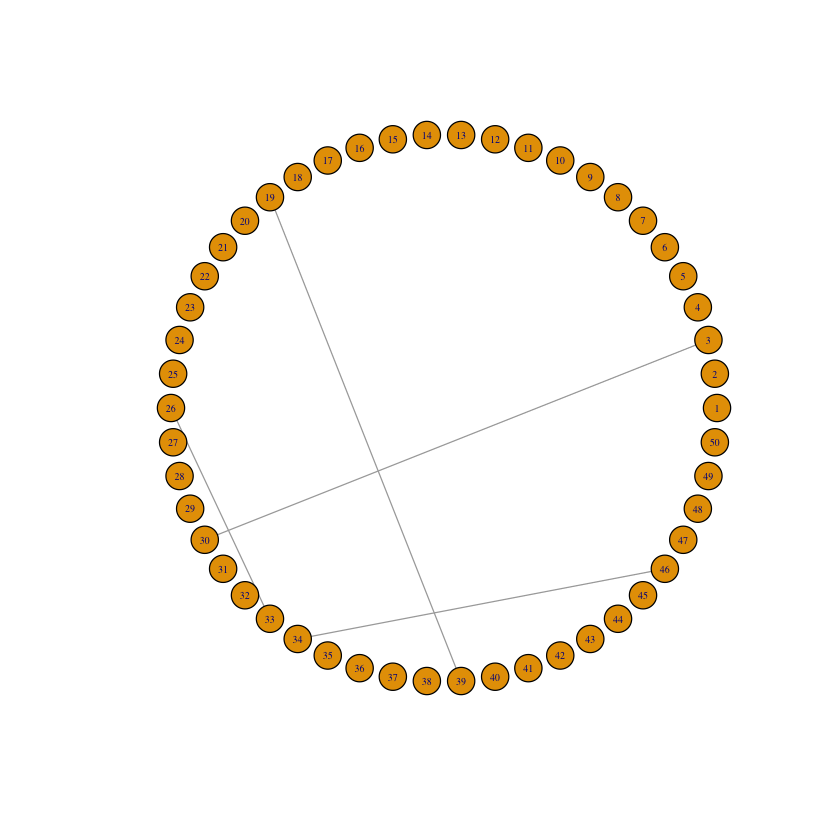

In [8]:
# if p >> 1/n^2 - expect P(at least one edge) -> 1
graph.random.gnp<-erdos.renyi.game(n=50,p.or.m=0.004,type="gnp",directed=F)
plot.igraph(graph.random.gnp,
layout=layout.circle,
vertex.size=10,
vertex.label.cex=.5)


[1] 0.02

[1] 3.912023

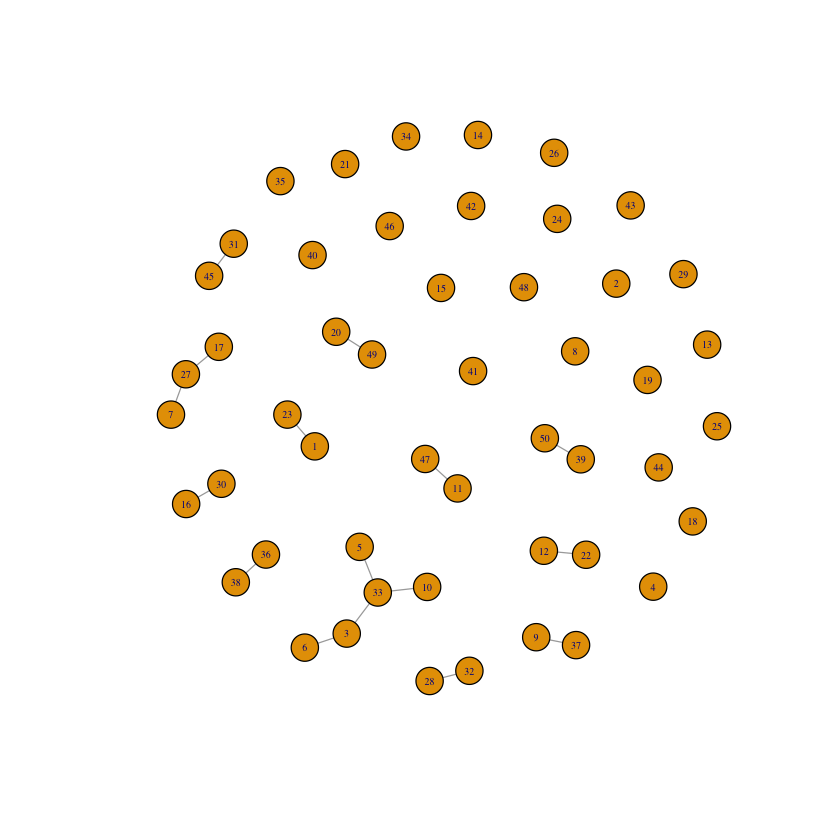

In [9]:
# At p < 1/n, the largest component should have O(log n) nodes 
1/n
log(n) # Approximate number of nodes in largest component if p < 1/n
graph.random.gnp<-erdos.renyi.game(n=50,p.or.m=0.01,type="gnp",directed=F)
plot.igraph(graph.random.gnp,
vertex.size=10,
vertex.label.cex=.5)
# Experiment with p. Can you find transition points for the emergence of triangles? Trees? When does a giant component emerge?

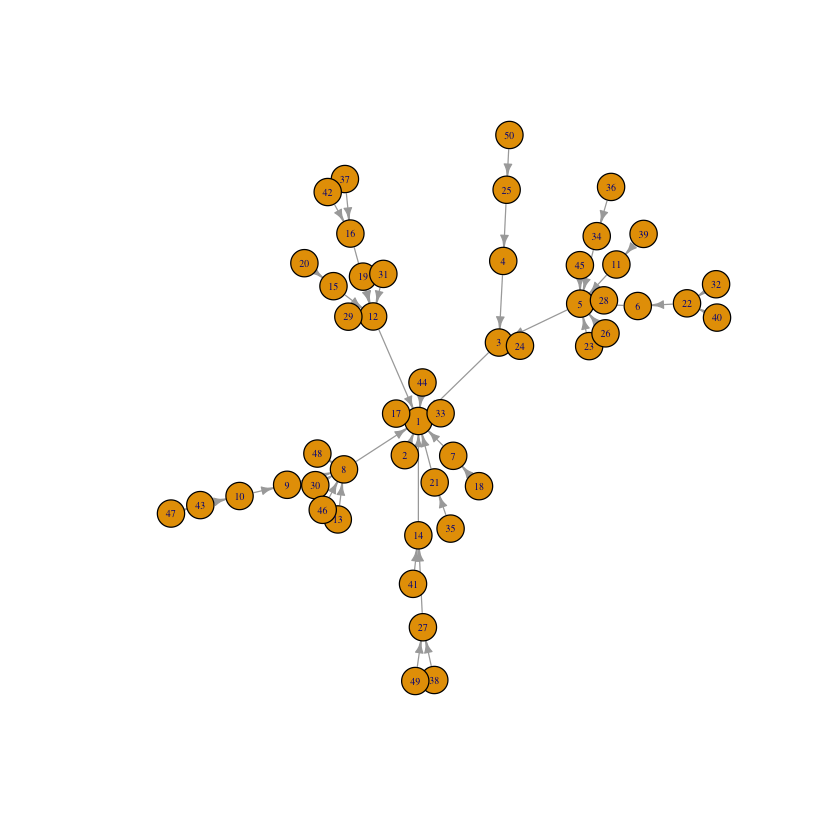

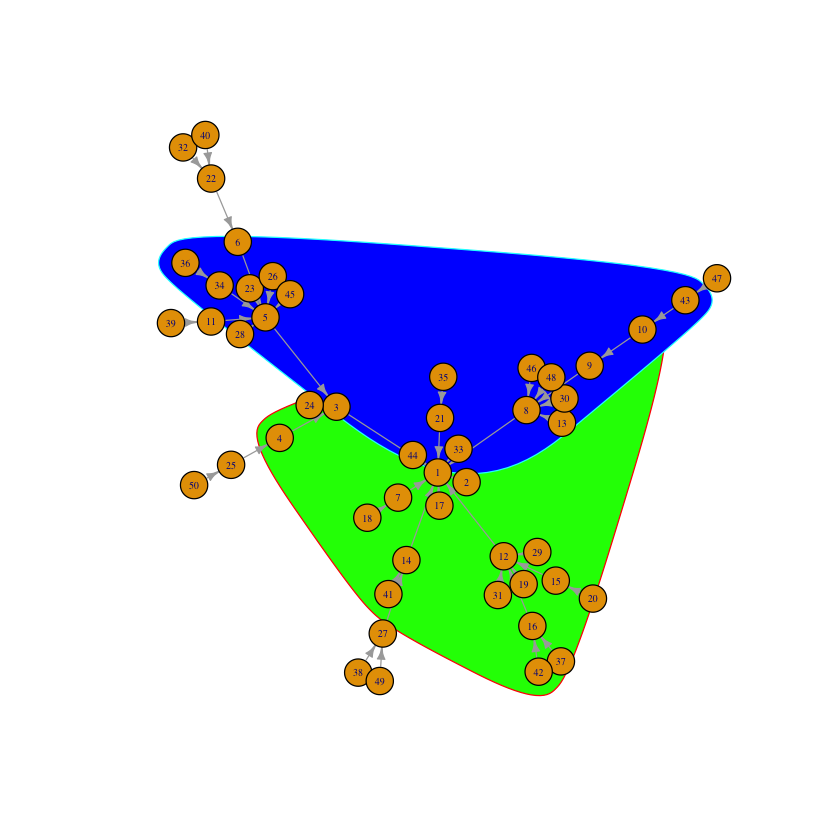

In [10]:
# Rather than being truly random, most real networks exhibit some type of organization. 
# Many real world networks are scale-free (i.e. the degree distribution follows a power law - 
# few nodes have many edges, and many nodes have few edges)
# To model scale free networks Barabasi and Albert developed the preferential attachment model in 1999. 
# In this model new nodes are more likely to link to nodes with a higher number of links.
# Note that this is not a true biological network, but a random graph with qualities similar to 
# those documented for biological networks. 
 
# In igraph we can use the barabasi.game() function:
graph.barabasi.1<-barabasi.game(n=50,power=1)
 
# For this graph we introduce some new plotting tools to specify layout and vertex/edge properties.
 
plot.igraph(graph.barabasi.1,
layout=layout.fruchterman.reingold,
vertex.size=10,         # sets size of the vertex, default is 15
vertex.label.cex=.5,    # size of the vertex label
edge.arrow.size=.5        # sets size of the arrow at the end of the edge
)

# We now observe the emergence of hub nodes

# there are a number of different plotting parameters see
#?igraph.plotting
#for details
 
plot.igraph(graph.barabasi.1,
layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5,
mark.groups=list(c(1,7,4,13,10,16,15,41,42,29),
c(2,48,5,36,43,33,9)), # draws polygon around nodes
mark.col=c("green","blue")
)

[1] "merges"     "modularity" "membership" "vcount"     "algorithm"

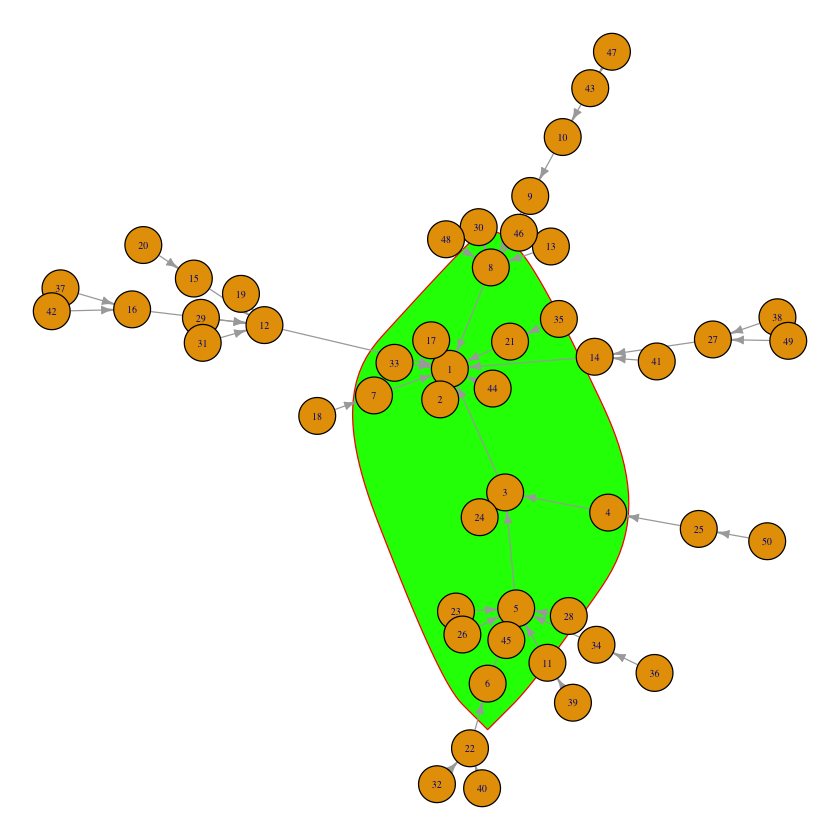

In [11]:
# In the above plot a green and blue polygon are used to highlight nodes 1 and 2 as hubs. 
# The "mark.groups" argument allows you to draw a polygon of specified color ("mark.col")
# around the nodes you specify in a list. Because barabasi.game() will give you 
# a different graph each time, the polygons described by the manually defined lists need to be updated every time. 

# A better approach is to use a community detection algorithm to determine the most densely 
# connected nodes in a graph.
 
barabasi.community<-walktrap.community(graph.barabasi.1)
 
# This algorithm uses random walks to find the most densely connected subgraphs.
 
members<-membership(barabasi.community)
# The members() function picks out the membership vector 
# (list of nodes in the most densely connected subgraph) from 
# the communtiy object (e.g., walktrap community).
 
par(mar=c(.1,.1,.1,.1))    # sets the edges of the plotting area
plot.igraph(graph.barabasi.1,
layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5,
mark.groups=list(members),
mark.col="green"
)
#barabasicomm1
names(barabasi.community)

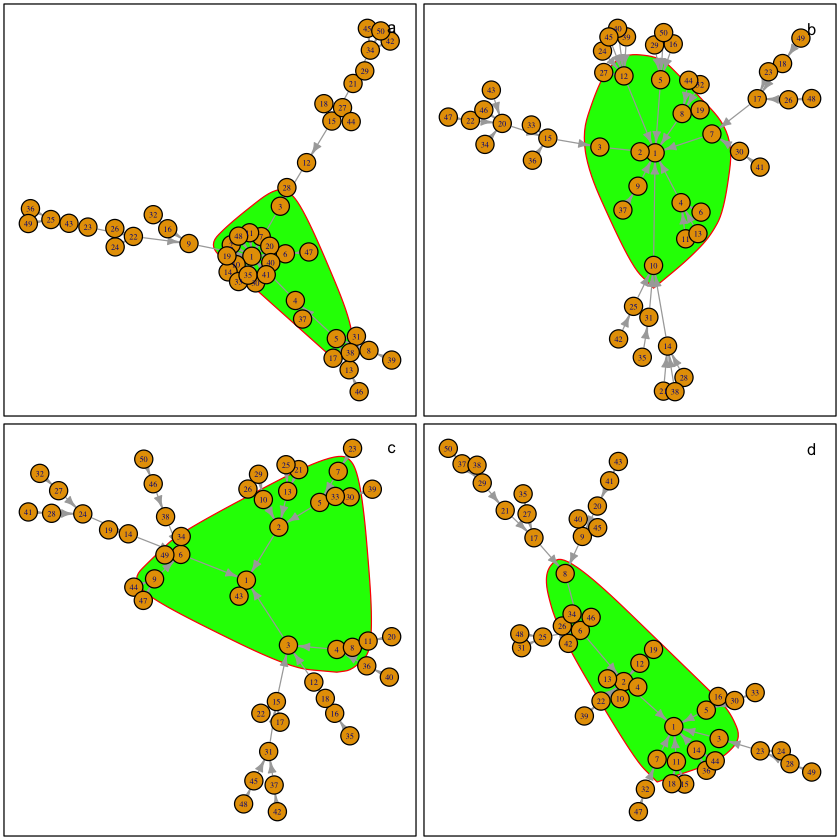

In [12]:
# With the above plot the group with the green polygon surrounding 
# it is the nodes listed as being a part of the walktrap community.
 
# Now we will play around with the "power" argument to see how that impacts the graphs.
# We will generate 4 networks with preferential attachment at varying levels.
barabasi.game.2<-barabasi.game(n=50,power=.75)
barabasi.game.3<-barabasi.game(n=50,power=.5)
barabasi.game.4<-barabasi.game(n=50,power=.25)
barabasi.game.5<-barabasi.game(n=50,power=0)
 
# These can be organized into a list for convenience.
barabasi.graphs<-list(barabasi.game.2,barabasi.game.3,barabasi.game.4,barabasi.game.5)
 
# Now lets use community detection, this time with the walktrap algorithm.
bg.community.list<-lapply(barabasi.graphs,walktrap.community)
bg.membership.list<-lapply(bg.community.list,membership)
 
txt<-c("a","b","c","d")    # vector for labeling the graphs
 
# Plot these four graphs in one window with:
par(mfrow=c(2,2),mar=c(.2,.2,.2,.2))
# The for loop here plots each graph in the list one by one into the window prepared by par.
for(i in 1:4){
plot.igraph(barabasi.graphs[[i]],
layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5,
mark.groups=list(bg.membership.list[[i]]),
mark.col="green",
frame=T # the frame argument plots a box around the graph
)
text(1,1,txt[i]) # calls from the vector to label the graph, adds to the graph that was last plotted
}
 
# Later we will look at the properties of these graphs to see exactly how they are different

2,1
3,1
4,3
5,3
6,5
7,1


from,to
2,1
3,1
4,3
5,3
6,5
7,1


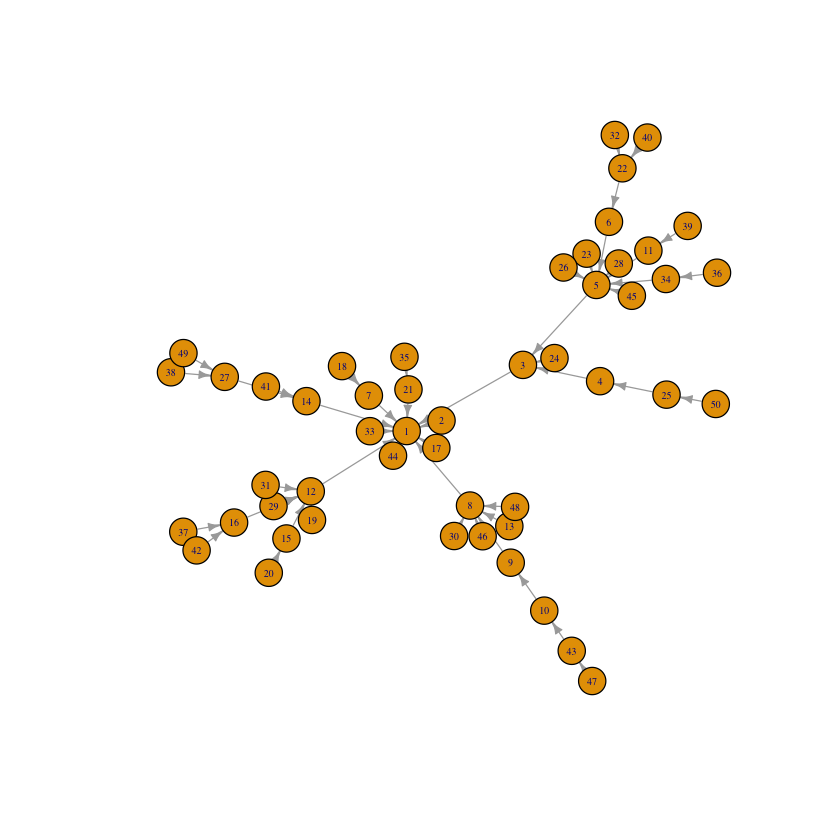

In [13]:
# Graphs can also be visualized as an adjacency matrix, usually an NxN matrix of 0s and 1s, 
# where 1 indicates an interaction, and 0 is no interaction.
 
# The function get.adjacency() converts a graph into a matrix.
barabasi.adjacency<-get.adjacency(graph.barabasi.1)
 
# A number of other functions will use the adjacency matrix to calculate different network properties.
 
# And we can get a graph from the adjacency matrix with graph.adjacency(). Often the data for graphs is in matrix form. Using graph.adjacency allows you to convert adjacency matrices into graph objects (that can then be plotted)
plot.igraph(graph.adjacency(barabasi.adjacency),
layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5)
 
# Similarly we can arrange the information in a number of other ways
# Edgelist
barabasi.edgelist<-get.edgelist(graph.barabasi.1)
 
# Dataframe
barabasi.data.frame<-get.data.frame(graph.barabasi.1,what="edges")

head(barabasi.edgelist)
head(barabasi.data.frame)

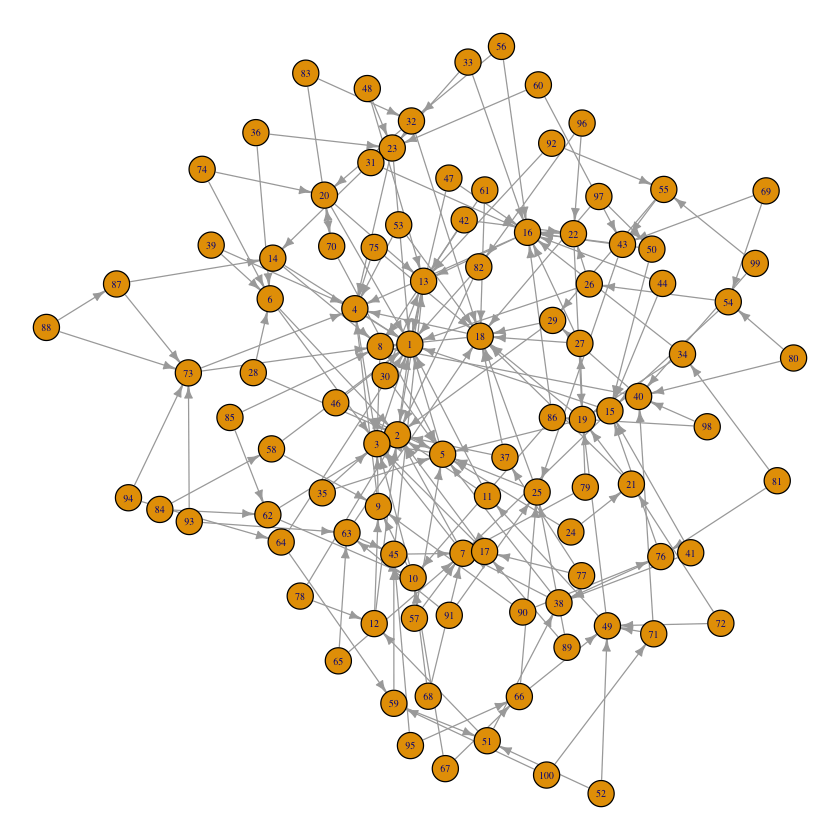

In [14]:
# PART II: NETWORK PROPERTIES

# Create a network to analyze using the preferential attachment model (power=.5)
 
test.graph<-barabasi.game(100,power=0.5,m=2)
# In this case we have set m=2, meaning that
# for each new node 2 new links are created
 
par(mar=c(.1,.1,.1,.1))
plot.igraph(test.graph,
layout=layout.fruchterman.reingold,
vertex.size=7,
vertex.label.cex=.5,
edge.arrow.size=.5)

In [15]:
# How large is the network? (This was set when we made the network, but what if it hadn't been?)
 
test.graph      # Returns that it is an IGRAPH object with 100 nodes and 197 links,
                # made with the Barabasi algorithm with parameter settings
                # as well as the edge list up to a certain count
V(test.graph)   # gives the vertex sequence
E(test.graph)   # gives the edge sequence (edge list)

IGRAPH 6532156 D--- 100 197 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from 6532156:
 [1]  2-> 1  3-> 1  3-> 2  4-> 1  4-> 3  5-> 1  5-> 3  6-> 3  6-> 2  7-> 3
[11]  7-> 2  8-> 3  8-> 1  9-> 4  9-> 3 10-> 9 10-> 3 11-> 1 11-> 2 12-> 9
[21] 12-> 2 13-> 2 13-> 1 14-> 1 14-> 8 15-> 7 15-> 1 16-> 4 16->13 17-> 2
[31] 17-> 3 18-> 4 18-> 8 19->18 19-> 5 20-> 1 20->13 21->18 21->19 22->16
[41] 22->19 23-> 1 23-> 4 24-> 5 24->21 25-> 5 25->18 26-> 1 26->22 27->16
[51] 27->18 28-> 6 28-> 2 29-> 2 29->18 30->13 30-> 5 31->14 31->16 32->20
[61] 32->18 33->16 33->23 34->16 34->19 35-> 3 35-> 5 36-> 6 36->23 37->18
+ ... omitted several edges

+ 100/100 vertices, from 6532156:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

+ 197/197 edges from 6532156:
  [1]  2-> 1  3-> 1  3-> 2  4-> 1  4-> 3  5-> 1  5-> 3  6-> 3  6-> 2  7-> 3
 [11]  7-> 2  8-> 3  8-> 1  9-> 4  9-> 3 10-> 9 10-> 3 11-> 1 11-> 2 12-> 9
 [21] 12-> 2 13-> 2 13-> 1 14-> 1 14-> 8 15-> 7 15-> 1 16-> 4 16->13 17-> 2
 [31] 17-> 3 18-> 4 18-> 8 19->18 19-> 5 20-> 1 20->13 21->18 21->19 22->16
 [41] 22->19 23-> 1 23-> 4 24-> 5 24->21 25-> 5 25->18 26-> 1 26->22 27->16
 [51] 27->18 28-> 6 28-> 2 29-> 2 29->18 30->13 30-> 5 31->14 31->16 32->20
 [61] 32->18 33->16 33->23 34->16 34->19 35-> 3 35-> 5 36-> 6 36->23 37->18
 [71] 37-> 2 38-> 7 38-> 5 39-> 6 39-> 4 40-> 8 40->29 41->38 41->15 42->22
 [81] 42-> 8 43->16 43->25 44->15 44->16 45-> 7 45->13 46-> 5 46-> 1 47->16
 [91] 47-> 1 48->23 48->13 49->11 49->19 50->16 50->15 51->12 51->38 52->51
+ ... omitted several edges

In [16]:
# The "GenInd()" function from the NetIndices package takes an adjacency matrix as input
# and returns 10 global properties of the graph
test.graph.adj<-get.adjacency(test.graph,sparse=F)
# in older versions of igraph the default was sparse=F,
# but now you must specify, other wise you get a matrix of 1s and .s
 
test.graph.properties<-GenInd(test.graph.adj)
 
# The function output consists of 10 network properties.
# Five of them are evaluated here:
 
test.graph.properties$N            #number of nodes
 
test.graph.properties$Ltot        #number of links
 
test.graph.properties$LD        #link density (average # of links per node)
 
test.graph.properties$C            #the connectance of the graph
# This function measures connectance as L/(N*(N-1)) where L is links, and N is nodes
# Connectance can also be calculated as L/(N^2)
names(test.graph.properties) # List all properties provided by GenInd

# More Information avaiable at https://www.rdocumentation.org/packages/NetIndices/versions/1.4.4/topics/GenInd
#N      number of compartments, excluding the externals. 
#T..    total System Throughput. 
#TST    total System Throughflow. 
#Lint   number of Internal links. 
#Ltot   total number of links. 
#LD     link Density. 
#C      connectance (internal). 
#Tijbar average Link Weight. 
#TSTbar average Compartment Throughflow . 
#Cbar   compartmentalization, [0,1], the degree of connectedness of subsystems within a network. 

# References:
# Latham LG. 2006. Network flow analysis algorithms. Ecological Modelling 192: 586-600. 
# Hirata H, Ulanowicz RE. 1984. Informational theoretical analysis of ecological networks. International journal of systems science 15 (3): 261-270 
# Pimm SL, Lawton JH. 1980. Are food webs divided into compartments? Journal of Animal Ecology 49: 879-898. 
# Kones, J.K., Soetaert, K., van Oevelen, D. and J.Owino (2009). Are network indices robust indicators of food web functioning? a Monte Carlo approach. Ecological Modelling, 220, 370-382. 

[1] 100

[1] 197

[1] 1.97

[1] 0.01989899

[1] "N"      "T.."    "TST"    "Lint"   "Ltot"   "LD"     "C"      "Tijbar"
 [9] "TSTbar" "Cbar"

[1] 17 14 11 10 11  6  9  8  6  6  3  4  9  4  7 13  4 14  6  5  4  5  6  2  6
 [26]  3  3  2  4  2  2  4  2  3  2  2  3  5  2  6  2  2  5  2  5  2  2  2  6  3
 [51]  4  2  2  4  4  2  2  3  4  2  2  4  5  3  2  4  2  2  2  3  3  2  6  2  2
 [76]  4  2  2  2  2  2  3  2  2  2  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2

[1] 48

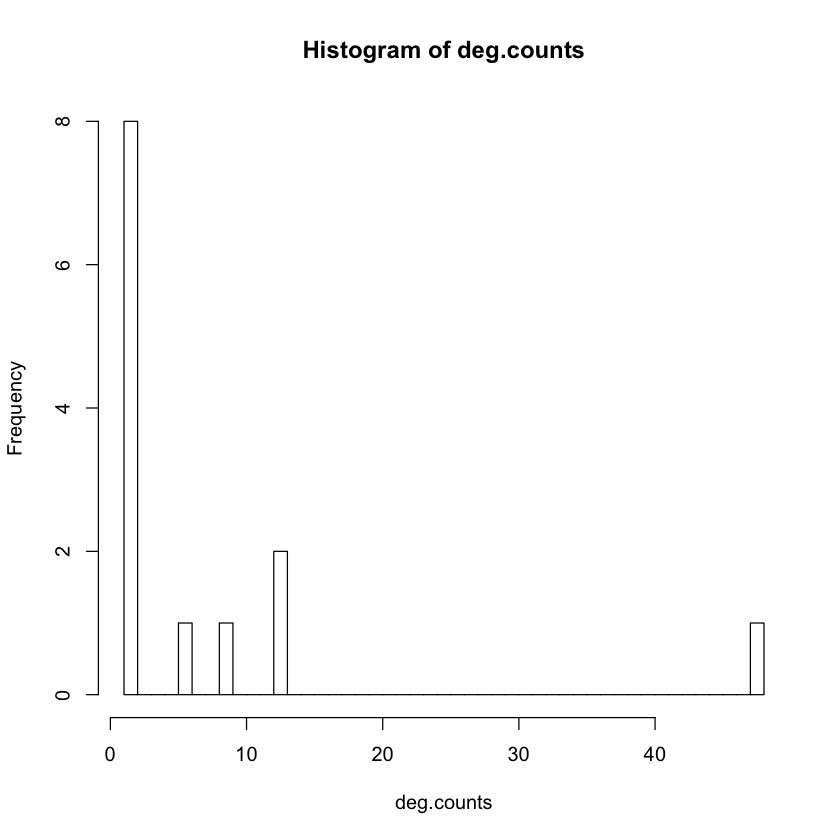

[1] 0.6613098

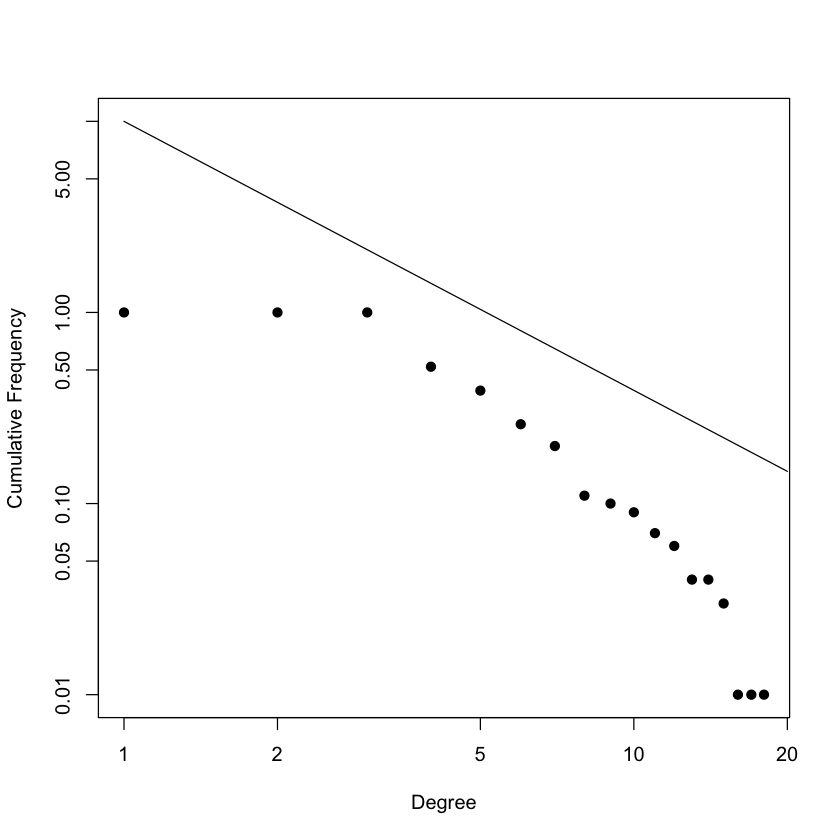

In [17]:
# The degree of a node refers to the number of links associated with a node.
# Degree can be measured as the links going in ("in degree"), out ("out degree"), or both.
# The degree() function takes a graph input and gives the degree of specified nodes.
# With the argument "v=V(graph)" you tell the function to give the degree of all nodes in the graph,
# while the "mode" argument specifies in, out, or both.
 
in.deg.testgraph<-degree(test.graph,v=V(test.graph),mode="in")
out.deg.testgraph<-degree(test.graph,v=V(test.graph),mode="out")
all.deg.testgraph<-degree(test.graph,v=V(test.graph),mode="all")

# Count & plot the number of times nodes with degree n appear in the graph
all.deg.testgraph
deg.counts <- table(all.deg.testgraph)
max(deg.counts)
hist(deg.counts,breaks=50) #,prob=T)
#lines(density(deg.counts)) # Use with prob=T

# Degree distribution is the cumulative frequency of nodes with a given degree
# this, like degree() can be specified as "in", "out", or "all"
deg.distr<-degree.distribution(test.graph,cumulative=T,mode="all")

# Using the power.law.fit() function you can fit a power law to the degree distribution
power<-power.law.fit(all.deg.testgraph)
 
# The output of the power.law.fit() function gives the exponent of the power law ($alpha)
# and the log-likelihood of the parameters used to fit the power law distribution ($logLik)
# Also, it performs a Kolmogov-Smirnov test to determine whether the given degree distribution 
# could have been drawn from the fitted power law distribution.
# The function returns a test statistic ($KS.stat) and p-value ($KS.p) for that test
 
# Then I can plot the degree distribution
plot(deg.distr,log="xy",
ylim=c(.01,10),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
 
# And the expected power law distribution
lines(1:20,10*(1:20)^((-power$alpha)+1))
 
# Random graphs typically have a Poisson distribution,
# Preferential attachement random graphs follow a power law
# Many real networks follow a truncated power law degree distribution

# Determine the 'goodness-of-fit' of power law to degree distribution using the Kolmogorov-Smirnov (KS) test
power$KS.p
# p is > 0.86, therefore these data are likely to follow a power law distribution
# Small p-values (less than 0.05) indicate that the test rejected the hypothesis that the original data 
# could have been drawn from the fitted power-law distribution.

In [18]:
ls() # See what's in the current work space 

[1] "all.deg.testgraph"     "barabasi.adjacency"    "barabasi.community"   
 [4] "barabasi.data.frame"   "barabasi.edgelist"     "barabasi.game.2"      
 [7] "barabasi.game.3"       "barabasi.game.4"       "barabasi.game.5"      
[10] "barabasi.graphs"       "bg.community.list"     "bg.membership.list"   
[13] "deg.counts"            "deg.distr"             "graph.barabasi.1"     
[16] "graph.fournode"        "graph.onelink"         "graph.random.gnm"     
[19] "graph.random.gnp"      "i"                     "in.deg.testgraph"     
[22] "members"               "n"                     "out.deg.testgraph"    
[25] "power"                 "test.graph"            "test.graph.adj"       
[28] "test.graph.properties" "txt"

[1] 5

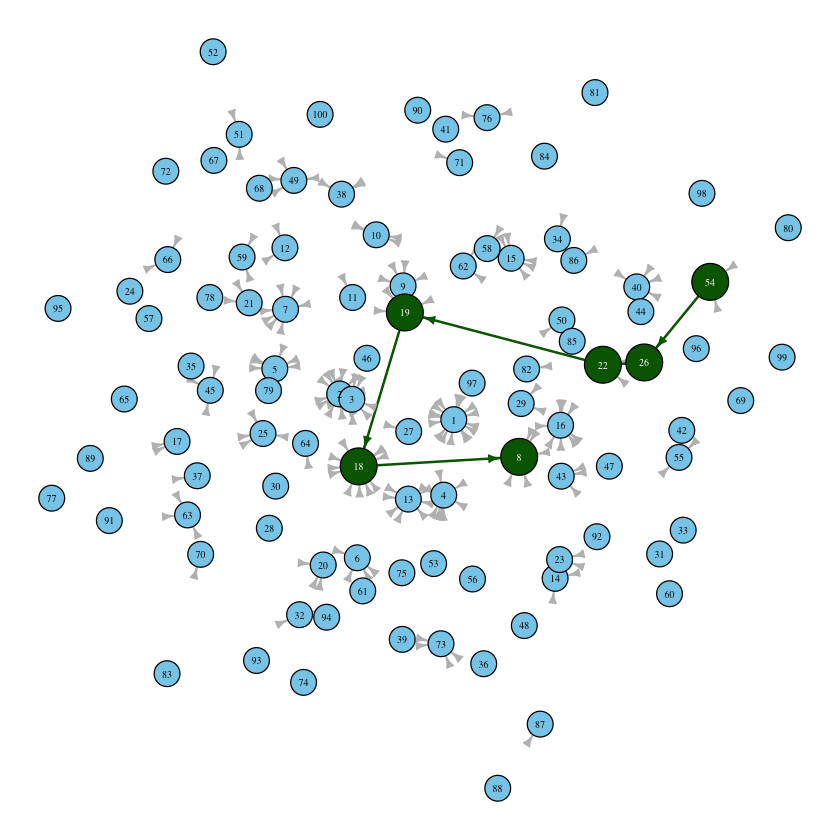

In [19]:
# Diameter is the longest shortest path between two vertices
diameter(test.graph) # Gives the length of the diameter while
nodes.diameter<-get.diameter(test.graph) # Gives the labels for each node that participate in the diameter
 
# To visualize the diameter
# First define the node and edge attributes
V(test.graph)$color<-"skyblue" # node default color
V(test.graph)$size<-7 # node default size
V(test.graph)[nodes.diameter]$color<-"darkgreen" # diameter node color
V(test.graph)[nodes.diameter]$size<-10 # diameter node size
V(test.graph)[nodes.diameter]$label.color<-"white" # diameter node label color

E(test.graph)$color<-"grey" # all non-diameter edges will be grey
E(test.graph,path=nodes.diameter)$color<-"darkgreen" # diameter edges will be dark green
E(test.graph,path=nodes.diameter)$width<-2 # diameter edges will be wider
 
# If you do not set the attributes of all of the nodes and edges then it will
# default such that you only see what you have defined

par(mar=c(.1,.1,.1,.1))
plot.igraph(test.graph,
layout=layout.fruchterman.reingold,
vertex.label.cex=.5,
edge.arrow.size=.5)

In [20]:
# Clustering coefficient is the proportion of
# a nodes neighbors that can be reached by other neighbors
# in igraph this property is apparently called "transitivity"
 
transitivity(test.graph)
# gives the clustering coefficient of the whole network
 
head(transitivity(test.graph,type="local"))
# gives the clustering coefficient of each node
 
# Betweenness is the number of shortest paths between two nodes that go through each node of interest
graph.betweenness<-betweenness(test.graph,v=V(test.graph))
head(graph.betweenness)

# The edge betweenness score of an edge measures the number of shortest paths through it
graph.edge.betweenness<-edge.betweenness(test.graph,e=E(test.graph))
head(graph.edge.betweenness)
 
# Closeness refers to how connected a node is to its neighbors
graph.closeness<-closeness(test.graph,vids=V(test.graph))
head(graph.closeness)

# Clustering coefficient, betweenness, and closeness
# all describe the small world properties of the network.
# A network with small world properties is one in which
# it takes a relatively short path to get from one node to the next
# (e.g., six degrees of separation)

[1] 0.06686047

[1] 0.08088235 0.09890110 0.18181818 0.11111111 0.05454545 0.13333333

[1]  0.00000 11.33333 34.66667 37.95000 33.06667  6.50000

[1] 12.33333  8.50000 28.16667 10.33333 30.61667 11.50000

[1] 0.0001010101 0.0001020304 0.0001030715 0.0001041233 0.0001041233
[6] 0.0001041233

[1] 1 5 2 3 4

[1] 1 5 2 4 3

[1] 1 5 2 4 3

[1] 1 5 4 2 3

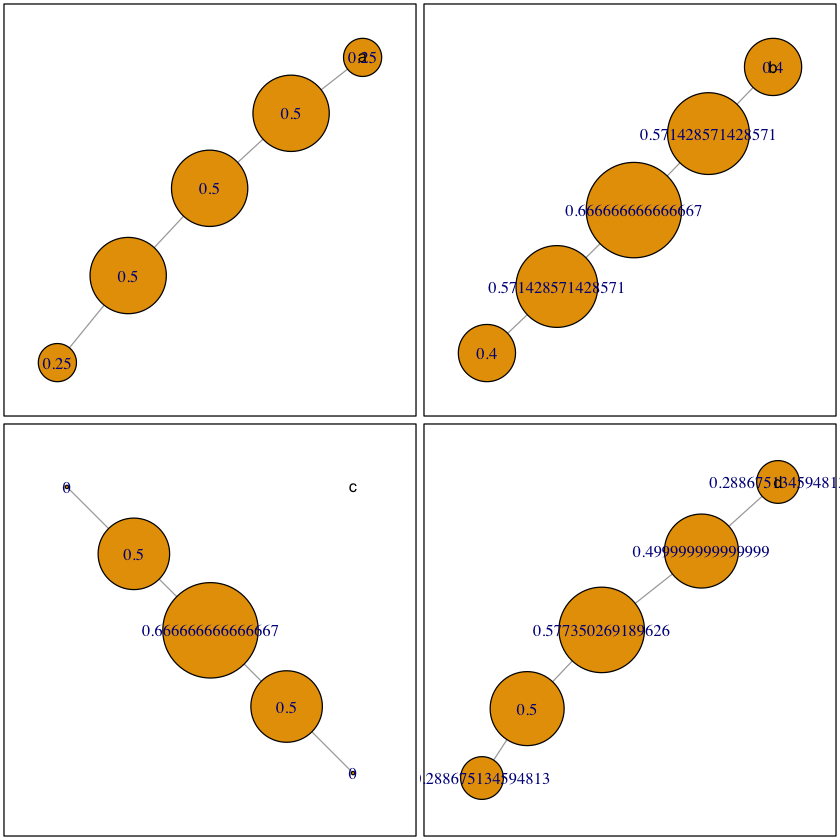

In [21]:
# Compare graph properties for similar graphs 
g <- graph.formula(A-B,B-C,C-D,D-E)
# g <- graph.formula(A-B,A-C,A-D,A-E,A-F)
# g <- graph.formula(A-B,B-C,C-D,C-E,C-F,D-F,E-F)

# Uncomment to get a simple list of values for each node
# Degree
#degree(g,normalized=T)
# Closeness (inverse of average dist)
#closeness(g,normalized=T)
# Betweenness
#betweenness(g,normalized=T)
# Local cluster coefficient - Doesn't make sense for very simple examples
#transitivity(g, type="local")
# Eigenvector centrality
#evcent(g,scale=F)$vector

# Now rank them
order(degree(g))
order(closeness(g))
#order(transitivity(g,type="local"))
order(betweenness(g))
order(evcent(g,scale=T)$vector)

txt<-c("a","b","c","d")    # vector for labeling the graphs
par(mfrow=c(2,2),mar=c(.2,.2,.2,.2))
plot.igraph(g,vertex.size=100*degree(g,normalized=T),vertex.label=degree(g,normalized=T),layout=layout.auto,frame=T)
text(1,1,txt[1]) 
plot.igraph(g,vertex.size=100*closeness(g,normalized=T),vertex.label=closeness(g,normalized=T),layout=layout.auto,frame=T)
text(1,1,txt[2]) 
plot.igraph(g,vertex.size=100*betweenness(g,normalized=T),vertex.label=betweenness(g,normalized=T),layout=layout.auto,frame=T)
text(1,1,txt[3]) 
plot.igraph(g,vertex.size=100*evcent(g,scale=F)$vector,vertex.label=evcent(g,scale=F)$vector,layout=layout.auto,frame=T)
text(1,1,txt[4]) 

 


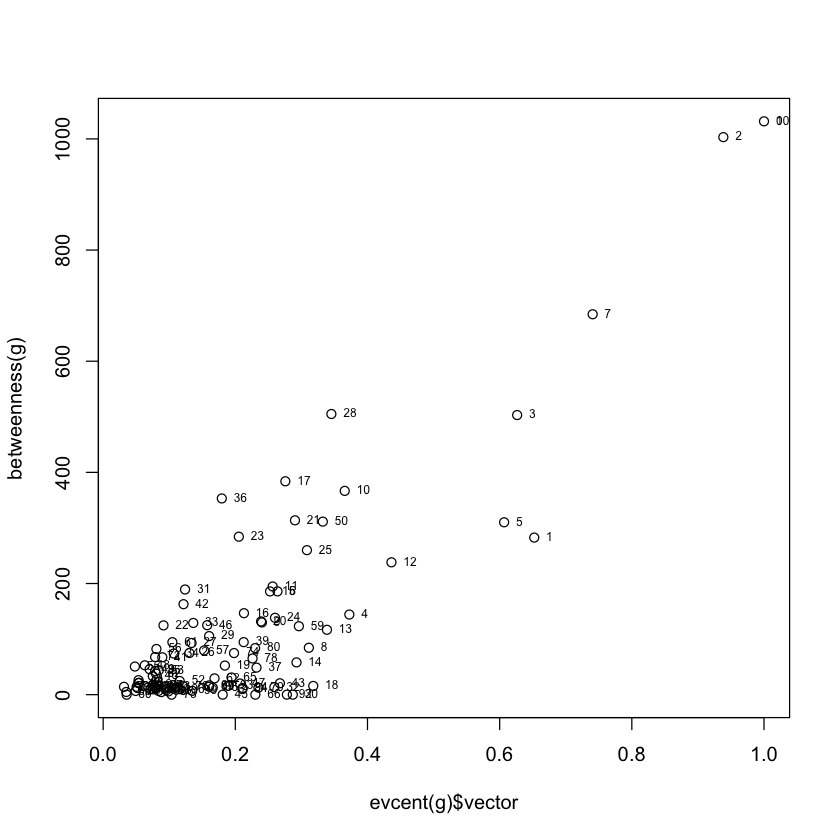

In [22]:
# Nodes with different roles in regulating 'information flow'
# A study found that people with low Eigenvector centrality but high Betweenness centrality
# in social networks are important 'gate keepers', while people with high Eigenvector centrality but low Betweenness 
# centrality have direct contact to important persons. So lets plot Eigenvector centrality against Betweenness 
# centrality to identify individuals with these qualities.

# Create a graph
g1 <- barabasi.game(100, directed=F)
g2 <- barabasi.game(100, directed=F)
g <- g1 %u% g2
lay <- layout.fruchterman.reingold(g)
# Plot the eigevector and betweenness centrality
plot(evcent(g)$vector, betweenness(g))
text(evcent(g)$vector, betweenness(g), 0:100, 
cex=0.6, pos=4)




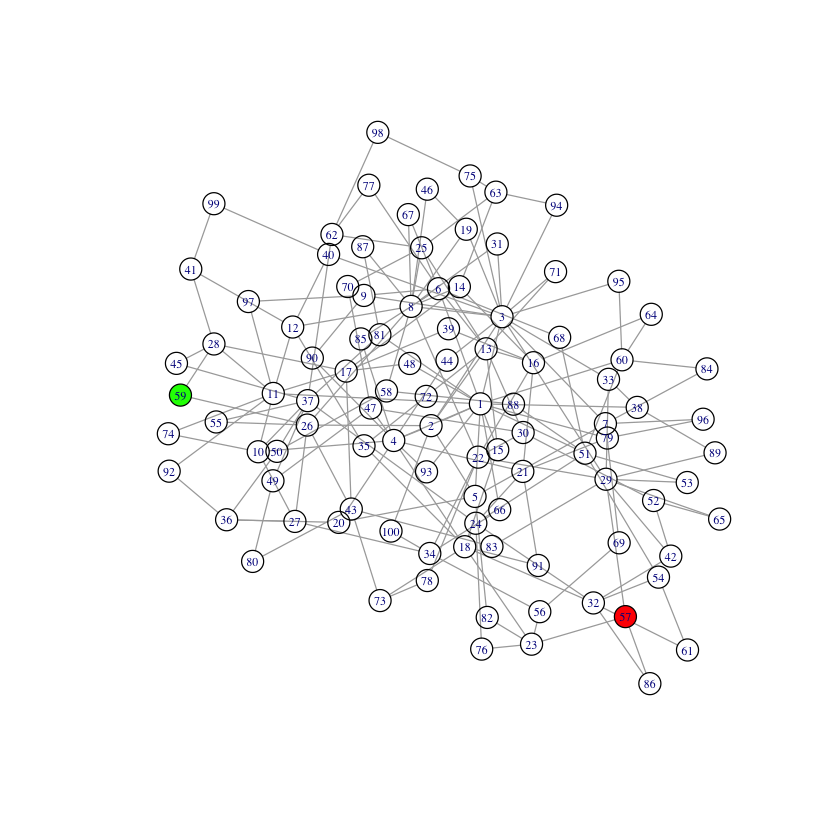

In [23]:
V(g)[57]$color <- 'red'
V(g)[59]$color <- 'green'
plot(g, layout=lay, vertex.size=8, 
vertex.label.cex=0.6)

[1]  347   23    0  196 1174    0    0    0    0    0    0    0    0

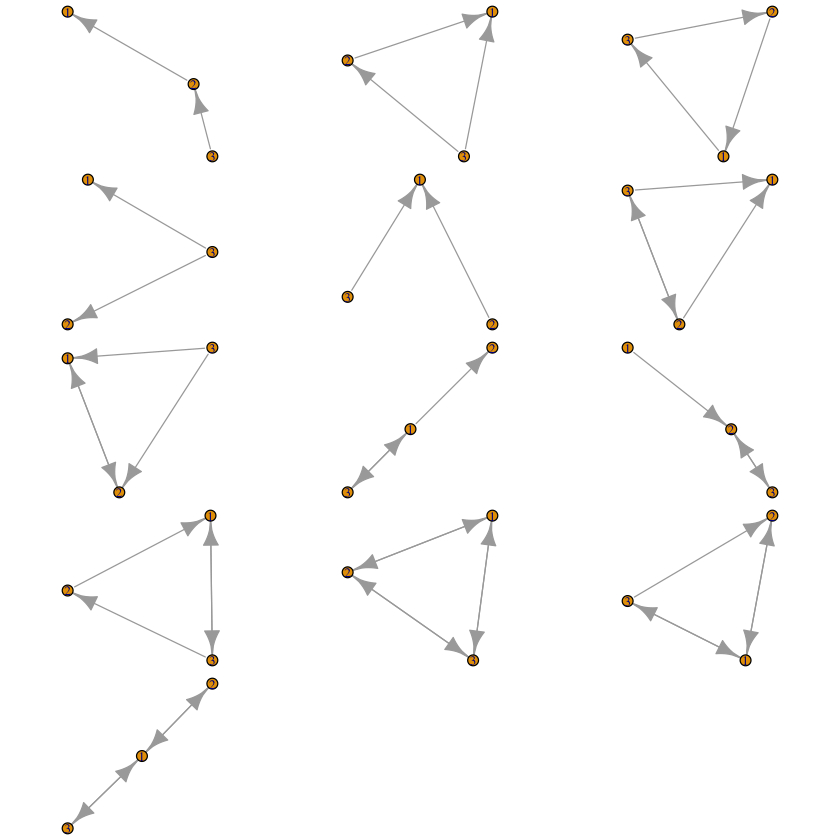

In [24]:
# Every graph can be decomposed into its component n-node subgraphs.
# In particular there are 13 unique ways to arrange 3 nodes in directed graphs.
# Here are the adjacency matrices for each of the 13 subgraphs
s1<-matrix(c(0,1,0,0,0,1,0,0,0),nrow=3,ncol=3)
s2<-matrix(c(0,1,1,0,0,1,0,0,0),nrow=3,ncol=3)
s3<-matrix(c(0,1,0,0,0,1,1,0,0),nrow=3,ncol=3)
s4<-matrix(c(0,0,1,0,0,1,0,0,0),nrow=3,ncol=3)
s5<-matrix(c(0,1,1,0,0,0,0,0,0),nrow=3,ncol=3)
d1<-matrix(c(0,1,1,0,0,1,0,1,0),nrow=3,ncol=3)
d2<-matrix(c(0,1,1,1,0,1,0,0,0),nrow=3,ncol=3)
d3<-matrix(c(0,0,1,1,0,0,1,0,0),nrow=3,ncol=3)
d4<-matrix(c(0,0,0,1,0,1,0,1,0),nrow=3,ncol=3)
d5<-matrix(c(0,1,1,0,0,1,1,0,0),nrow=3,ncol=3)
d6<-matrix(c(0,1,1,1,0,1,1,1,0),nrow=3,ncol=3)
d7<-matrix(c(0,1,1,1,0,1,1,0,0),nrow=3,ncol=3)
d8<-matrix(c(0,1,1,1,0,0,1,0,0),nrow=3,ncol=3)
 
# Make the 13 matrices into a list
subgraph3.mat<-list(s1,s2,s3,s4,s5,d1,d2,d3,d4,d5,d6,d7,d8)
# And convert the matrices into graph objects
subgraph3.graph<-lapply(subgraph3.mat,graph.adjacency)
 
# Loop through the list of subgraphs and count how many times that subgraph appears in the larger test.graph
subgraph.count<-c()
for(i in 1:13){
subgraph.count[i]<- graph.count.subisomorphisms.vf2(test.graph,subgraph3.graph[[i]],vertex.color1=NULL,vertex.color2=NULL,edge.color1=NULL,edge.color2=NULL)
}
subgraph.count

par(mar=c(0,0,0,0),mfrow=c(5,3))
plot.igraph(subgraph3.graph[[1]])
plot.igraph(subgraph3.graph[[2]])
plot.igraph(subgraph3.graph[[3]])
plot.igraph(subgraph3.graph[[4]])
plot.igraph(subgraph3.graph[[5]])
plot.igraph(subgraph3.graph[[6]])
plot.igraph(subgraph3.graph[[7]])
plot.igraph(subgraph3.graph[[8]])
plot.igraph(subgraph3.graph[[9]])
plot.igraph(subgraph3.graph[[10]])
plot.igraph(subgraph3.graph[[11]])
plot.igraph(subgraph3.graph[[12]])
plot.igraph(subgraph3.graph[[13]])

In [26]:
# PART III: FOOD WEB data set

# Kim N. Mouritsen, Robert Poulin, John P. McLaughlin and David W. Thieltges. 2011.
# Food web including metazoan parasites for an intertidal ecosystem in New Zealand.
# Ecology 92:2006.
 
# Website: http://esapubs.org/archive/ecol/E092/173/
 
# Otago Harbour: intertidal mudflat
otago.links.data<-read.csv("https://github.com/jihoonkim/MED263/raw/master/week2/Otago_Data/Otago_Data_Links.csv")
otago.nodes.data<-read.csv("https://github.com/jihoonkim/MED263/raw/master/week2/Otago_Data/Otago_Data_Nodes.csv")


# Column names for data
colnames(otago.links.data)
colnames(otago.nodes.data)

Warning message in file(file, "rt"):
“cannot open URL 'https://github.com/jihoonkim/MED263/raw/master/week2/Otago_Data/Otago_Data_Links.csv': HTTP status was '404 Not Found'”

ERROR: Error in file(file, "rt"): cannot open the connection to 'https://github.com/jihoonkim/MED263/raw/master/week2/Otago_Data/Otago_Data_Links.csv'


In [ ]:
# Convert the data into a graph object using the first 2 columns of the dataset as an edgelist
otago.graph<-graph.edgelist(as.matrix(otago.links.data[,1:2]))
# Create graph object of just predator prey links
otago.graph.p<-graph.edgelist(as.matrix(otago.links.data[1:1206,1:2]))
 
# Get the web into matrix form
otago.adjmatrix<-get.adjacency(otago.graph,sparse=F)
otago.adjmatrix.p<-get.adjacency(otago.graph.p,sparse=F)
 
# Get the basic network indices from the matrices with GenInd()
ind.otago<-GenInd(otago.adjmatrix)
ind.otago.p<-GenInd(otago.adjmatrix.p)
 
# Now to plot these two webs to get a feel for what we are dealing with
 
par(mar=c(.1,.1,.1,.1))
plot.igraph(otago.graph,vertex.label=NA,vertex.size=3,edge.arrow.size=.25,layout=layout.circle)
plot.igraph(otago.graph.p,vertex.label=NA,vertex.size=3,edge.arrow.size=.25,layout=layout.circle)

In [ ]:
# The NetIndices package also has a function to get some of the trophic properties of the food web
# TrophInd() takes in an adjacency matrix and gives an output of the trophic level of each node,
# as well as an index of the degree of omnivory for each node
 
troph.otago<-TrophInd(otago.adjmatrix)
troph.otago.p<-TrophInd(otago.adjmatrix.p)
 
# An interesting aside, by adding parasites to the web it increases the trophic level of all species in
# this web.
 
plot(troph.otago[1:123,1]~troph.otago.p[,1],xlab="Level Without Parasites",ylab="Level With Parasites")
abline(a=0,b=1)

In [ ]:
# An interesting use for this trophic level function is to then use trophic level as a plotting parameter.
# This way, you can plot the food web nodes according to trophic height. This adds greatly to a plot
# of a food web, since you can gain more information about the trophic structure of the web by simply
# glancing at the plot.
 
# First we need to create a two-column matrix identifying the x and y values for each node.
layout.matrix.1<-matrix(nrow=length(V(otago.graph)), ncol=2) # Rows equal to the number of vertices
layout.matrix.1[,1]<-runif(length(V(otago.graph))) # randomly assign along x-axis
layout.matrix.1[,2]<-troph.otago$TL # y-axis value based on trophic level
 
layout.matrix.1p<-matrix(nrow=length(V(otago.graph.p)), ncol=2) # Rows equal to the number of vertices
layout.matrix.1p[,1]<-runif(length(V(otago.graph.p)))
layout.matrix.1p[,2]<-troph.otago.p$TL
 
# Now use these matrices to define the layout instead of using the circle layout
par(mar=c(.1,.1,.1,.1),mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=12)
 
plot.igraph(otago.graph,
vertex.label.cex=.35,
vertex.size=3,
edge.arrow.size=.25,
layout=layout.matrix.1)
 
plot.igraph(otago.graph.p,
vertex.label.cex=.35,
vertex.size=3,
edge.arrow.size=.25,
layout=layout.matrix.1p)
 
# Note: Using runif() means that there is some chance that two nodes with the same trophic level
# will be right on top of one another

In [ ]:
# The inclusion of parasites also impacts community detection
wtc.otago<-walktrap.community(otago.graph)
wtc.otago.p<-walktrap.community(otago.graph.p)
 
par(mar=c(0,0,0,0),mfrow=c(1,2))
#par(mar=c(.1,.1,.1,.1),mfrow=c(1,2))

options(repr.plot.width=10, repr.plot.height=12)

plot.igraph(otago.graph,
vertex.label.cex=.35,
vertex.size=3,
edge.arrow.size=.25,
layout=layout.matrix.1,
mark.groups=wtc.otago$membership,
mark.col="green")
 
plot.igraph(otago.graph.p,
vertex.label.cex=.35,
vertex.size=3,
edge.arrow.size=.25,
layout=layout.matrix.1p,
mark.groups=wtc.otago.p$membership,
mark.col="green")
 
# It is clear that the increase in the connectivity of the web with parasites has led to
# a larger densely connected community

In [ ]:
# It is clear that the increase in the connectivity of the web with parasites has led to
# a larger densely connected community
 
# The degree distribution of a food web can tell us a lot about the amount of specialization and
# generalization in the web (in degree), as well as vulnerability (out degree)
 
deg.otago<-degree(otago.graph)
deg.otago.p<-degree(otago.graph.p)
 
# Using the degree distribution gives a better way to visualize any differences
# Looking at the in degree tells us about how general the diets of consumers are
dd.otago.in<-degree.distribution(otago.graph,mode="in",cumulative=T)
dd.otago.in.p<-degree.distribution(otago.graph.p,mode="in",cumulative=T)
 
# Out degree is a measure of the vulnerability of organisms, telling us how many consumers
# eat each species.
dd.otago.out<-degree.distribution(otago.graph,mode="out",cumulative=T)
dd.otago.out.p<-degree.distribution(otago.graph.p,mode="out",cumulative=T)
 
par(mfrow=c(2,2))
plot(dd.otago.in,xlim=c(0,80))
plot(dd.otago.out,xlim=c(0,80))
plot(dd.otago.in.p,xlim=c(0,80))
plot(dd.otago.out.p,xlim=c(0,80))

In [ ]:
# And finally the degree ("all") simply tells us about how well connected that species is
# within the network
dd.otago<-degree.distribution(otago.graph,mode="all",cumulative=T)
dd.otago.p<-degree.distribution(otago.graph.p,mode="all",cumulative=T)
 
power.fit<-power.law.fit(deg.otago)
power.fit.p<-power.law.fit(deg.otago.p)
 
par(mfrow=c(1,2))
plot(dd.otago,log="xy")
lines(1:180,10*(1:180)^((-power.fit$alpha)+1))
 
plot(dd.otago.p,log="xy")
lines(1:100,10*(1:100)^((-power.fit.p$alpha)+1))

In [ ]:
# We can look at the diameter of the two versions of the web
# For food webs the diameter is going to be the longest food chain
# since energy only flows in one direction, the diameter will read from
# basal species to top predator.
 
get.diameter(otago.graph)
get.diameter(otago.graph.p)
 
# Here it is interesting to note that the diameter of the predator-prey only
# food web (which we expect to be smaller) is not a subset of the diameter for the
# larger parasites included network

In [ ]:
# The next few properties are all related to the small world-ness of the network:
transitivity(otago.graph)
transitivity(otago.graph.p)
 
# Betweenness is the number of shortest paths going through a specified node or edge
otago.between<-betweenness(otago.graph)
otago.between.p<-betweenness(otago.graph.p)
 
plot(otago.between[1:123]~otago.between.p)
abline(a=0,b=1)
 
otago.edge.between<-edge.betweenness(otago.graph)
otago.edge.between.p<-edge.betweenness(otago.graph.p)
 
head(closeness(otago.graph))

In [ ]:
# Here are the adjacency matrices for each of the 13 subgraphs again
s1<-matrix(c(0,1,0,0,0,1,0,0,0),nrow=3,ncol=3)
s2<-matrix(c(0,1,1,0,0,1,0,0,0),nrow=3,ncol=3)
s3<-matrix(c(0,1,0,0,0,1,1,0,0),nrow=3,ncol=3)
s4<-matrix(c(0,0,1,0,0,1,0,0,0),nrow=3,ncol=3)
s5<-matrix(c(0,1,1,0,0,0,0,0,0),nrow=3,ncol=3)
d2<-matrix(c(0,1,1,1,0,1,0,0,0),nrow=3,ncol=3)
d1<-matrix(c(0,1,1,0,0,1,0,1,0),nrow=3,ncol=3)
d3<-matrix(c(0,0,1,1,0,0,1,0,0),nrow=3,ncol=3)
d4<-matrix(c(0,0,0,1,0,1,0,1,0),nrow=3,ncol=3)
d5<-matrix(c(0,1,1,0,0,1,1,0,0),nrow=3,ncol=3)
d6<-matrix(c(0,1,1,1,0,1,1,1,0),nrow=3,ncol=3)
d7<-matrix(c(0,1,1,1,0,1,1,0,0),nrow=3,ncol=3)
d8<-matrix(c(0,1,1,1,0,0,1,0,0),nrow=3,ncol=3)
 
# Turn them into a convenient list
subgraph3.mat<-list(s1,s2,s3,s4,s5,d1,d2,d3,d4,d5,d6,d7,d8)
# And then into a list of graph objects
subgraph3.graph<-lapply(subgraph3.mat,graph.adjacency)
 
# Count the number of the 13 different 3-node subgraphs in the two webs
subgraph.freq.otago<-c()
subgraph.freq.otago.p<-c()
for(i in 1:13){
subgraph.freq.otago[i]<-
graph.count.subisomorphisms.vf2(otago.graph,subgraph3.graph[[i]],vertex.color1 = NULL,vertex.color2 = NULL,edge.color1 = NULL,edge.color2=NULL)
subgraph.freq.otago.p[i]<-graph.count.subisomorphisms.vf2(otago.graph.p,subgraph3.graph[[i]],vertex.color1 = NULL,vertex.color2 = NULL,edge.color1 = NULL,edge.color2=NULL)
}
 
plot(subgraph.freq.otago,type="o",lty=3, xlab="Subgraph",ylab="Frequency")
points(subgraph.freq.otago.p,type="o",lty=2)
 
plot(subgraph.freq.otago~subgraph.freq.otago.p)
abline(a=0,b=1)